<h1 style = "color : Sky blue"> Plotting Exercise</h1>  

The dataset used in this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes. 

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data into a dataframe
data = pd.read_csv("diamonds.csv", header = 0)

# As a preparatory step, let's drop Unnamed column.
data = data.drop("Unnamed: 0", axis =1 )

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

Since, its asked to investigate on single variable "price", choosing histogram to observe the variation of prices

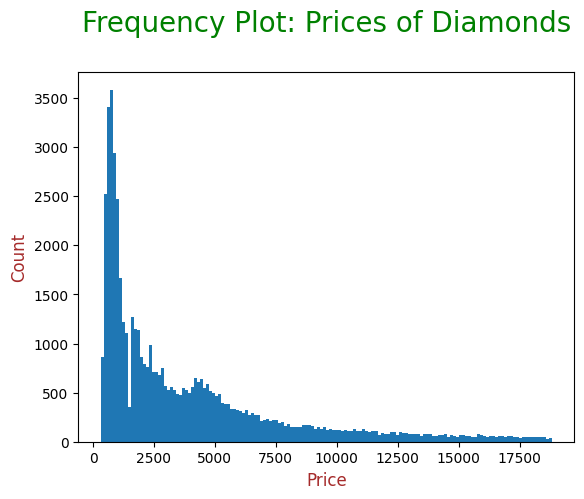

In [3]:
plt.hist(data["price"], bins = 150)

# Adding and formatting title
plt.title("Frequency Plot: Prices of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

Cut variable is of type dimension. So, displaying variation using bar chart. 

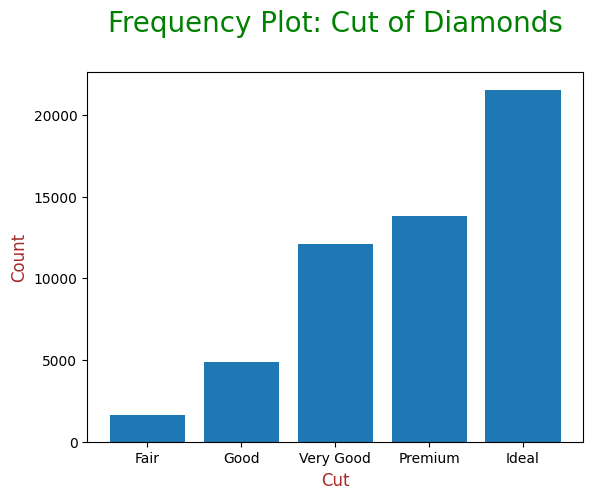

In [4]:
# Before plotting extract the required data by performing necessary data manipulation
groupdata = data.groupby("cut").count().reset_index()
x_vals = []
y_vals = []

for i in groupdata["cut"]:
    x_vals.append(i)
    y_vals.append(groupdata[groupdata.cut == i]['carat'].item())

# Sort values for better comparision
x_vals = [x for _, x in sorted(zip(y_vals, x_vals))]
y_vals.sort()

plt.bar(x_vals, y_vals)

# Adding and formatting title
plt.title("Frequency Plot: Cut of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

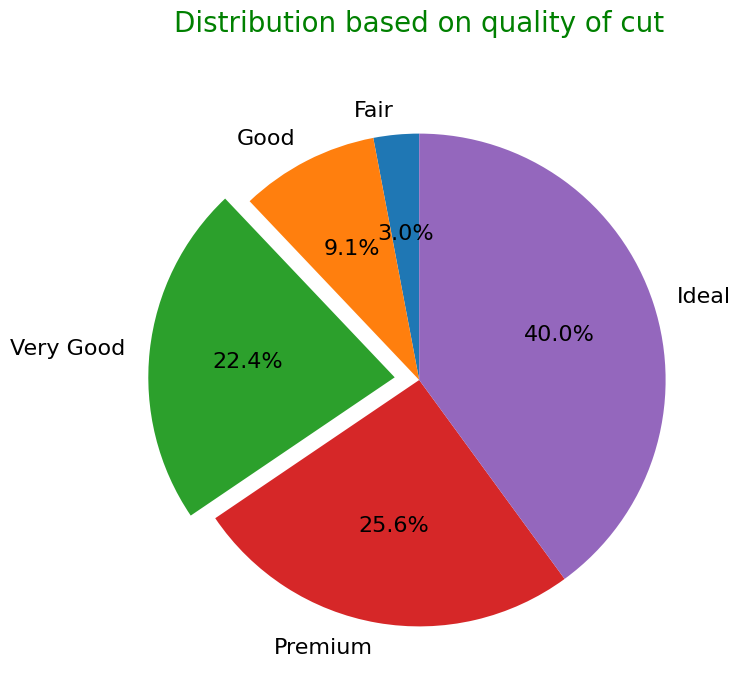

In [5]:
explode = (0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [8,8])

plt.pie(y_vals, explode=explode, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

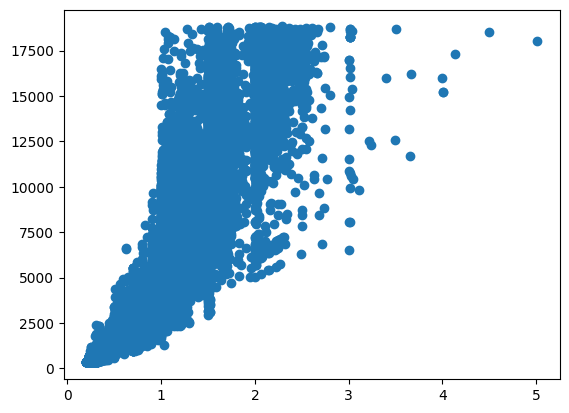

In [6]:
plt.scatter(data = data , x = 'carat', y = 'price')
plt.show()

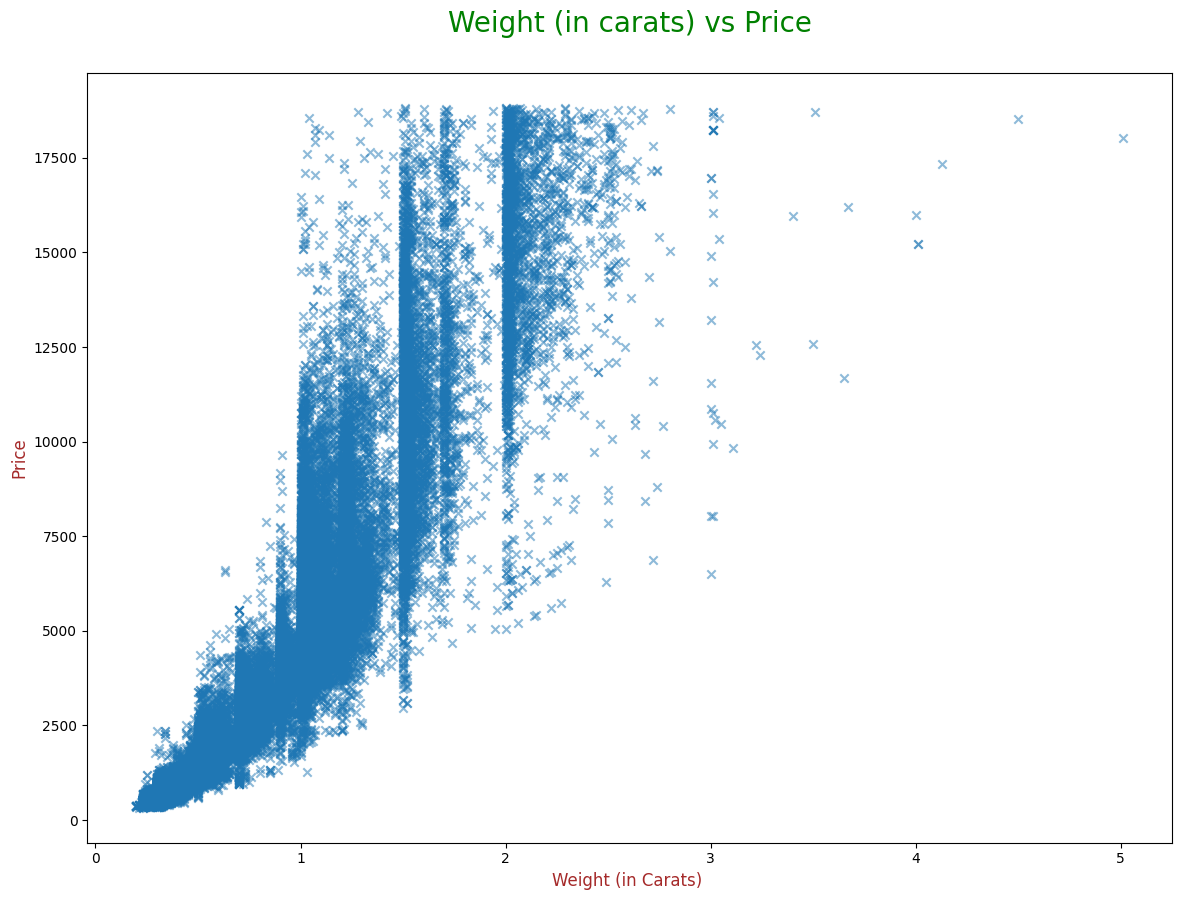

In [7]:
plt.figure(figsize = [14,10])
plt.scatter(data = data , x = 'carat', y = 'price', alpha = 0.5, marker="x")

# Adding and formatting title
plt.title("Weight (in carats) vs Price\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Weight (in Carats) ", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Observations:
1. A general trend observed is as the weight in carats goes on increasing so does the price. 
2. There are specific weights to which diamonds are manufactured. 
3. There is also a lot of variation in price with the same weight.

<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

In [10]:
data_fair = data[data['cut'] == 'Fair']
data_good = data[data['cut'] == 'Good']
data_vgood = data[data['cut'] == 'Very Good']
data_premium = data[data['cut'] == 'Premium']
data_ideal = data[data['cut'] == 'Ideal']

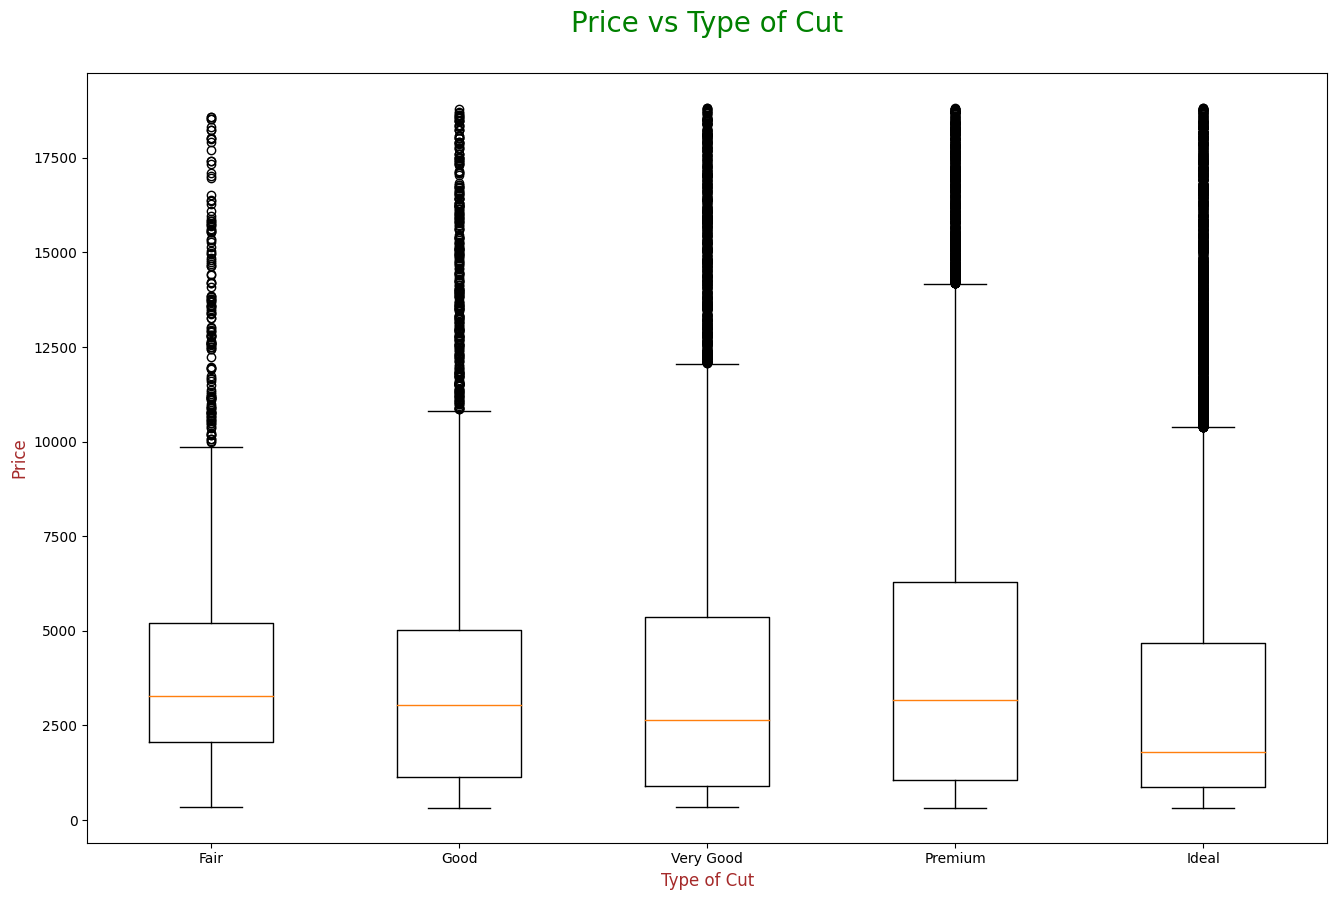

In [11]:
plt.figure(figsize = [16,10])
plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])

plt.xticks((1,2,3,4,5), ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

# Adding and formatting title
plt.title("Price vs Type of Cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type of Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Observations: 
1. The median price of the ideal cut is the least among all the five. 
2. There are a lot of outliers in the ideal cut.